#  *A Fine Windy Day

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
dataset.shape

(28200, 22)

In [5]:
#Total number of features
len(dataset.columns)

22

In [6]:
#No. of Missing values in each feature
dataset.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [7]:
#features containing null values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
print(features_with_na)
print(len(features_with_na))

['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)', 'atmospheric_pressure(Pascal)', 'windmill_body_temperature(°C)', 'wind_direction(°)', 'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)', 'windmill_height(m)', 'windmill_generated_power(kW/h)']
16


In [8]:
#percentage of null values in each feature
for feature in features_with_na:
    print(feature,':',np.round(dataset[feature].isnull().mean(),4) *100,'% missing values')

wind_speed(m/s) : 0.97 % missing values
atmospheric_temperature(°C) : 12.23 % missing values
shaft_temperature(°C) : 0.01 % missing values
blades_angle(°) : 0.77 % missing values
engine_temperature(°C) : 0.04 % missing values
motor_torque(N-m) : 0.09 % missing values
generator_temperature(°C) : 0.04 % missing values
atmospheric_pressure(Pascal) : 9.6 % missing values
windmill_body_temperature(°C) : 8.38 % missing values
wind_direction(°) : 18.099999999999998 % missing values
rotor_torque(N-m) : 2.03 % missing values
turbine_status : 6.239999999999999 % missing values
cloud_level : 0.98 % missing values
blade_length(m) : 18.060000000000002 % missing values
windmill_height(m) : 1.9300000000000002 % missing values
windmill_generated_power(kW/h) : 0.73 % missing values


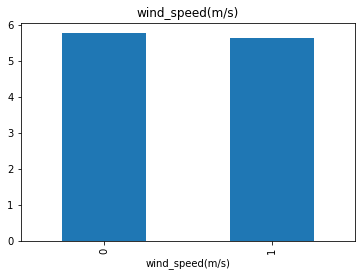

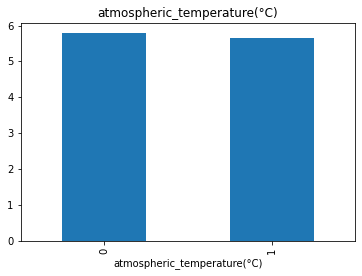

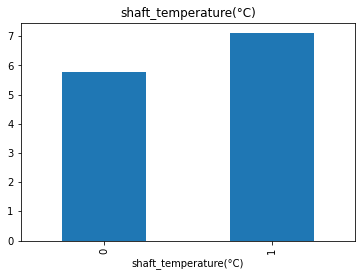

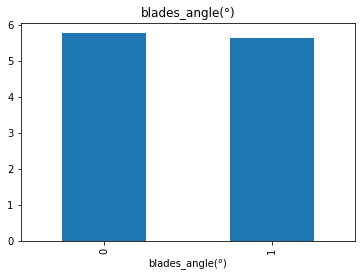

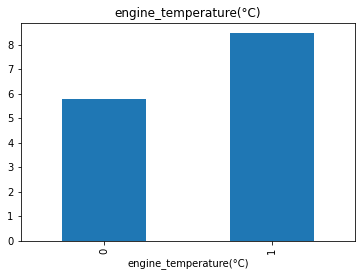

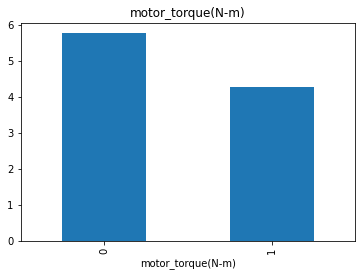

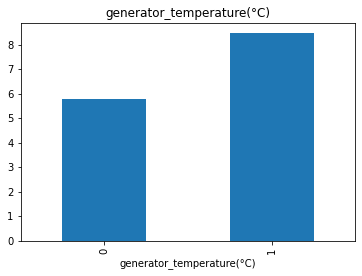

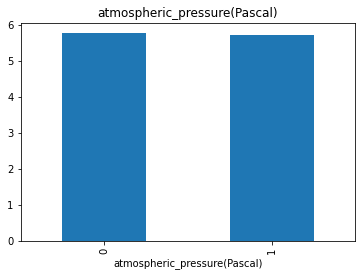

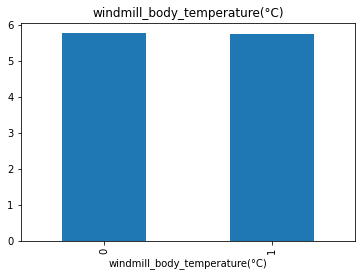

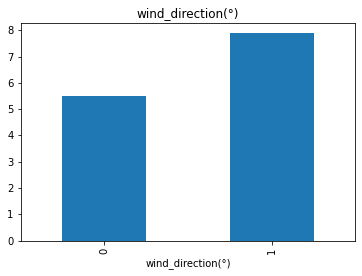

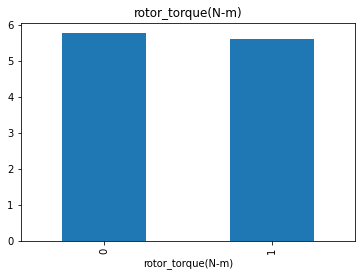

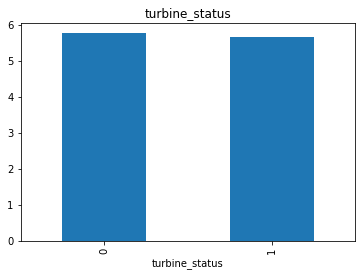

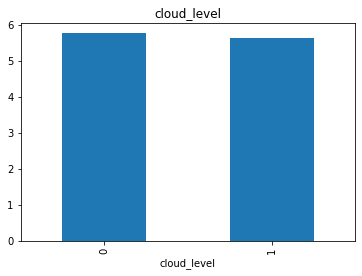

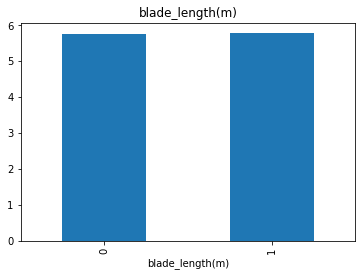

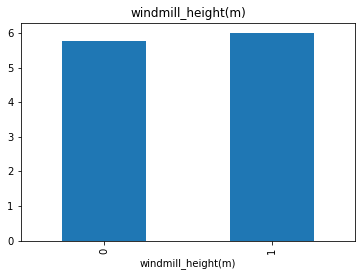

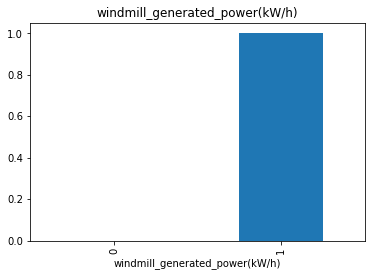

In [9]:
#Visualizing the effect of null values -v- non-null values w.r.t dependent feature(windmill_generated_power(kW/h))
for feature in features_with_na:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['windmill_generated_power(kW/h)'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [10]:
#finding datatypes of all the features
dataset.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
dtype: object

In [11]:
#finding all the numerical variables in the dataset
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(len(numerical_features))

18


In [12]:
dataset[numerical_features].head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,NaN,0.453374,27.971650,3.519074


In [13]:
#finding all the discrete numerical features
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature!=['Id']]
print(discrete_features)

[]


In [14]:
#finding all the continous numerical features
continous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(len(continous_features))

18


#### We can conclude that none of the features in the dataset are discrete, all are continous.

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


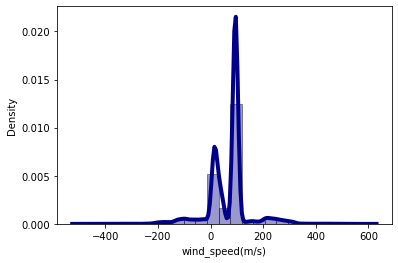

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


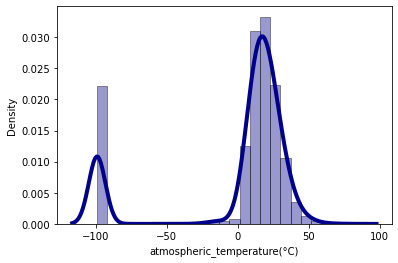

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


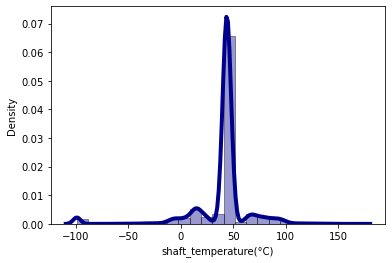

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


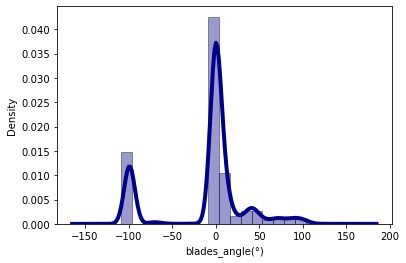

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


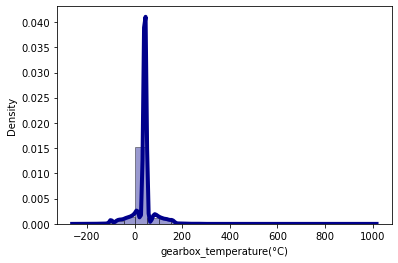

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


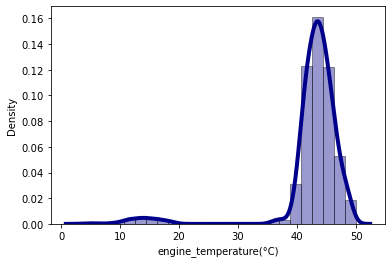

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


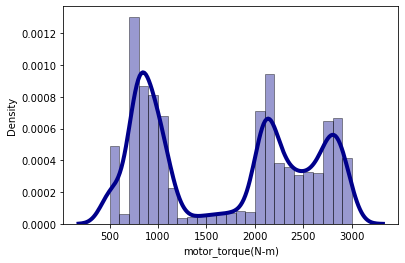

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


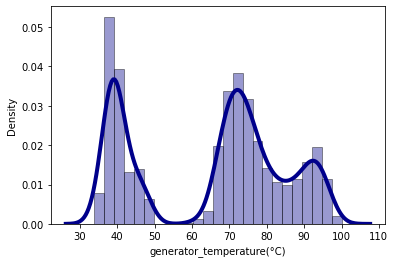

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


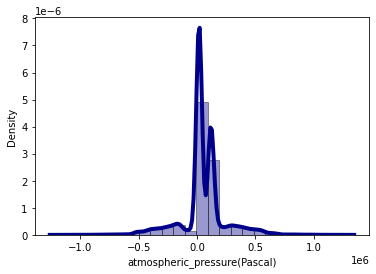

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


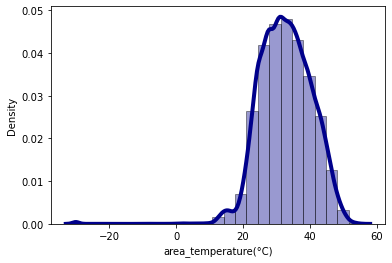

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


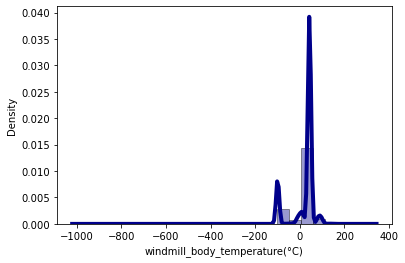

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


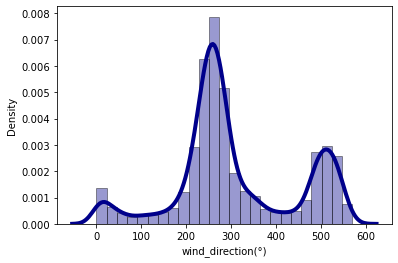

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


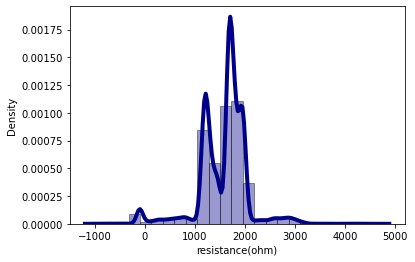

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


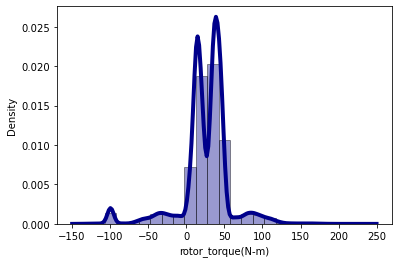

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


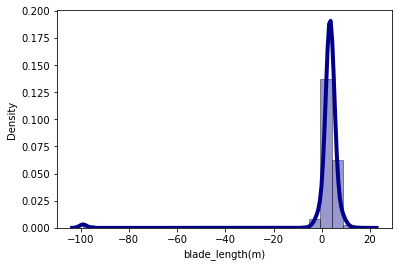

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


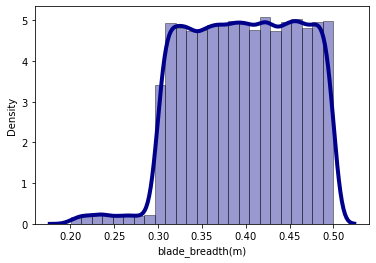

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


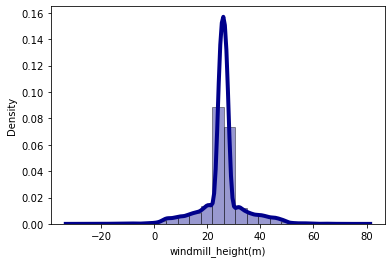

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


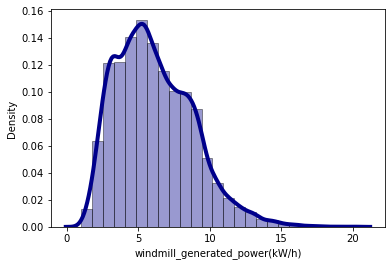

In [15]:
for feature in continous_features:
    sns.distplot(dataset[feature], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

#### None of the feature is perfectly gaussian but motot_torque(N-m) , generator_temperature(°C) , blade_breadth(m) are a long way from being gaussian

C:\Users\utkar\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


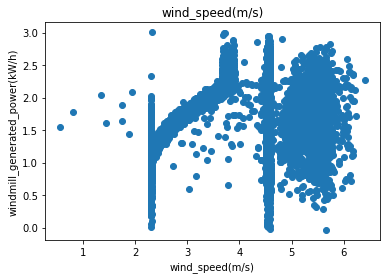

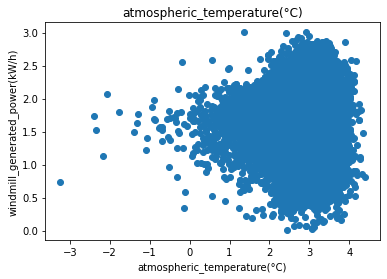

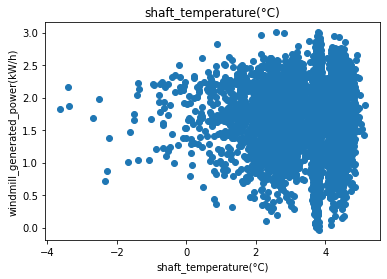

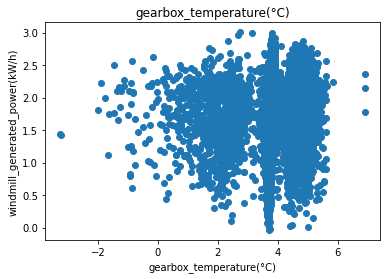

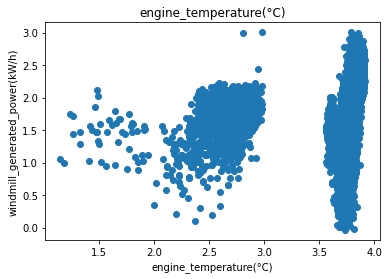

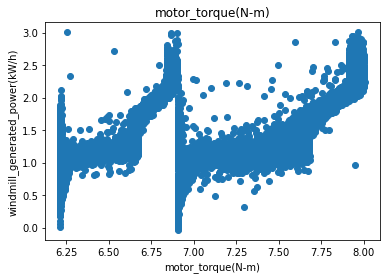

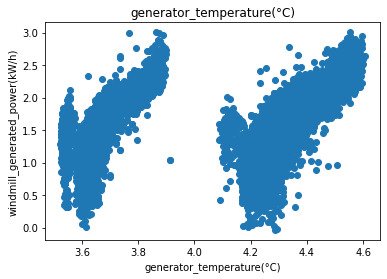

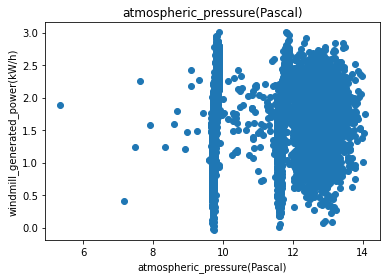

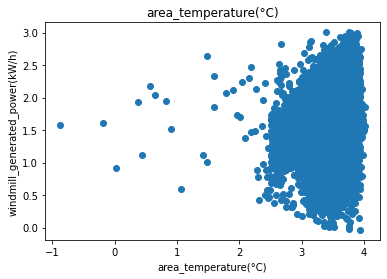

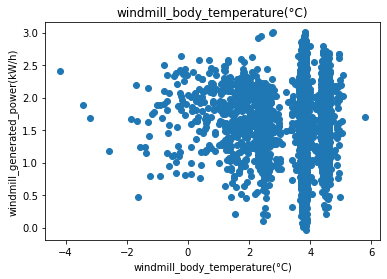

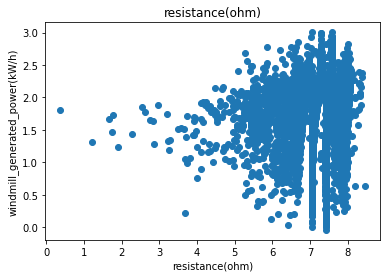

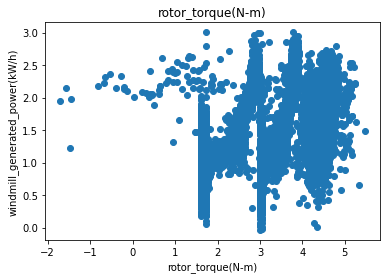

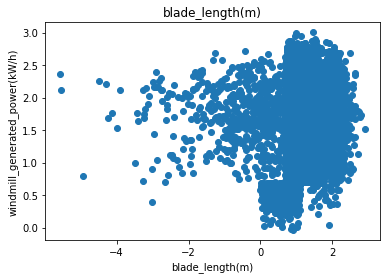

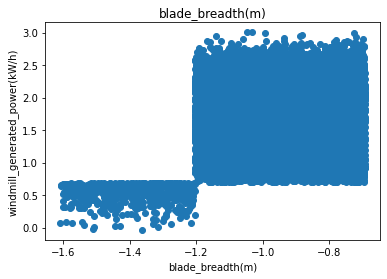

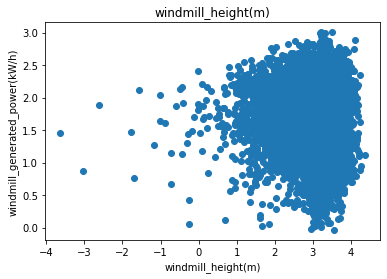

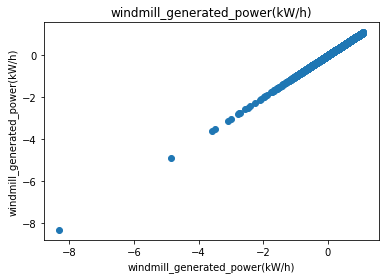

In [16]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['windmill_generated_power(kW/h)']=np.log(data['windmill_generated_power(kW/h)'])
        plt.scatter(data[feature],data['windmill_generated_power(kW/h)'])
        plt.xlabel(feature)
        plt.ylabel('windmill_generated_power(kW/h)')
        plt.title(feature)
        plt.show()

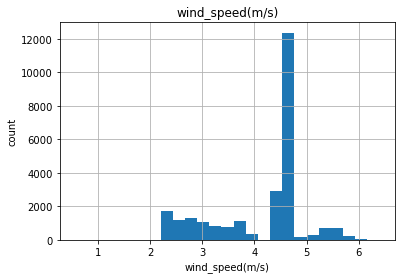

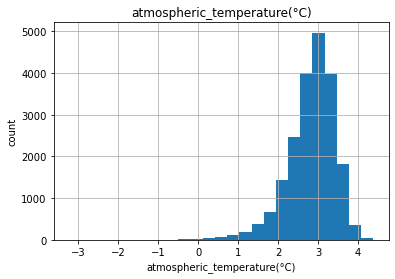

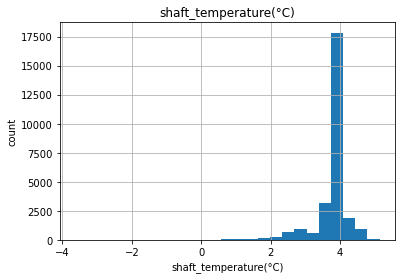

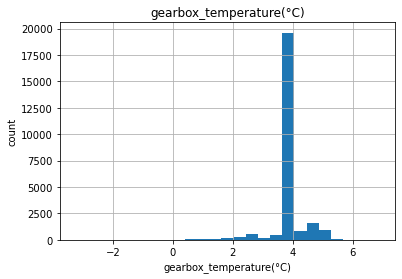

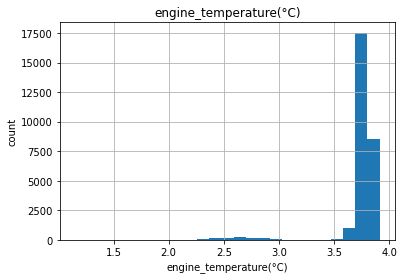

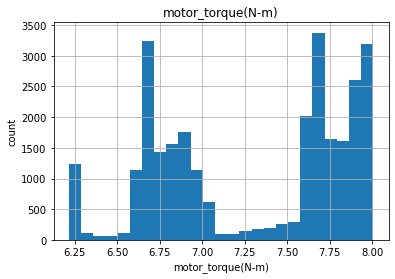

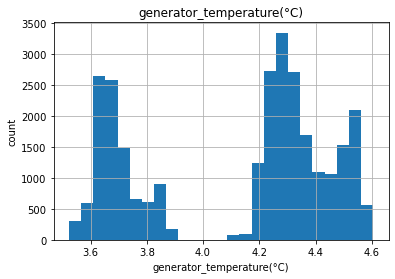

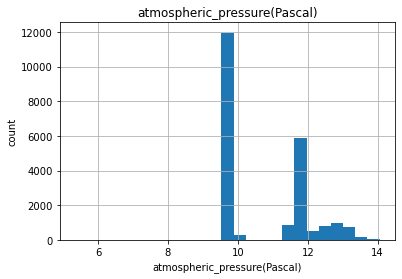

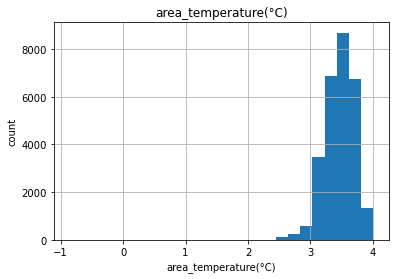

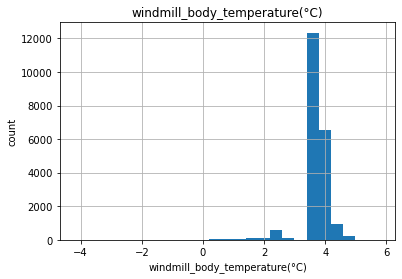

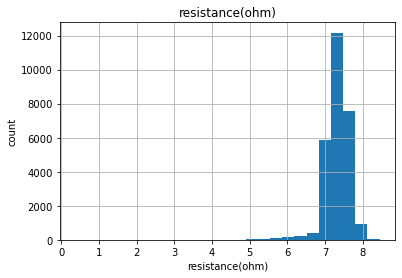

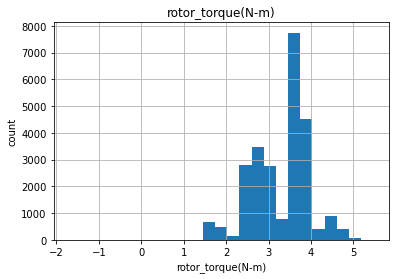

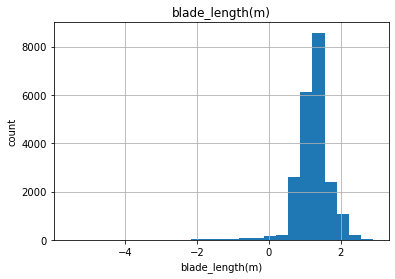

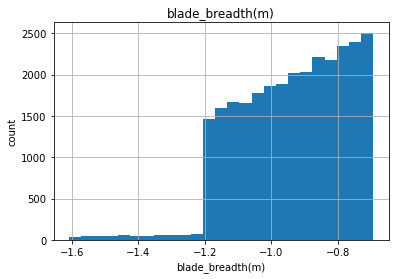

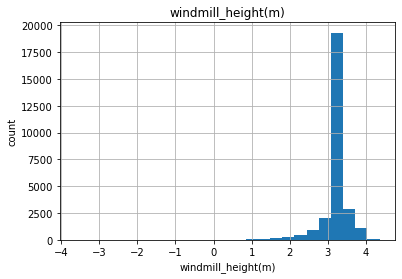

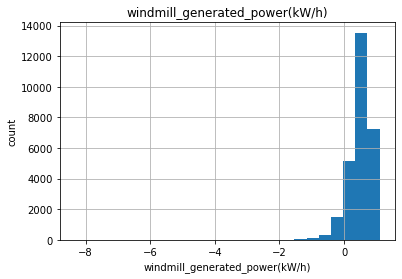

In [17]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['windmill_generated_power(kW/h)']=np.log(data['windmill_generated_power(kW/h)'])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

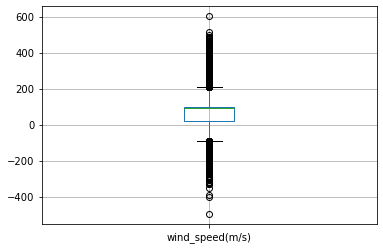

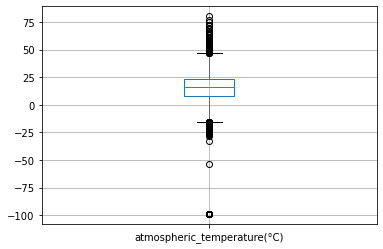

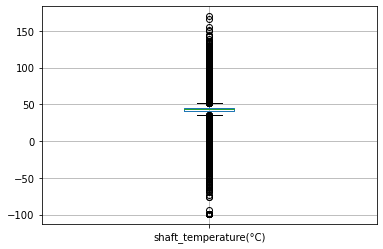

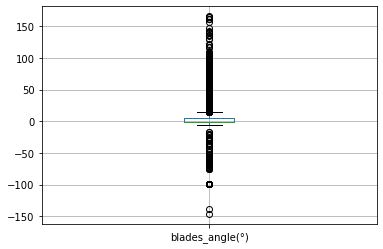

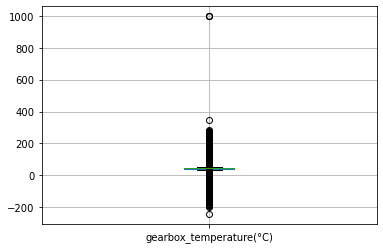

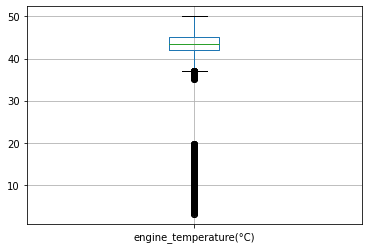

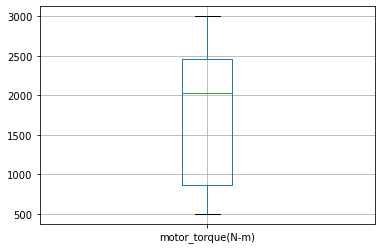

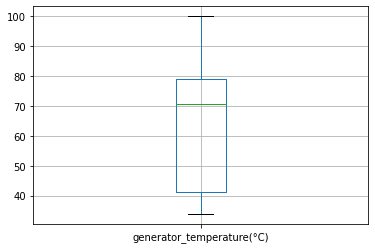

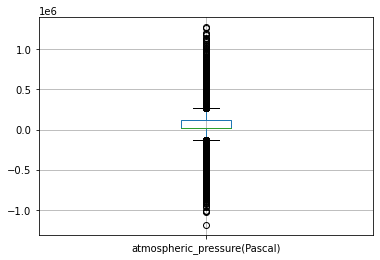

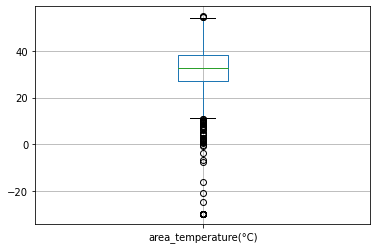

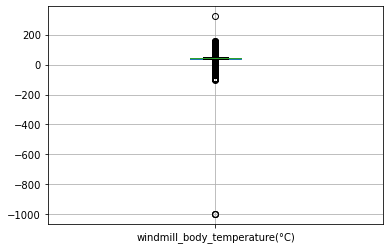

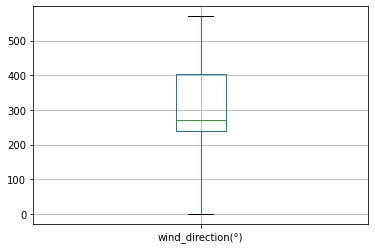

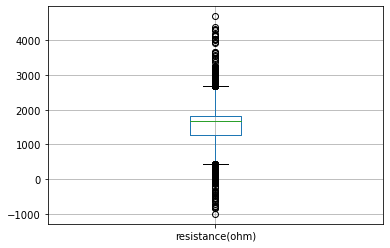

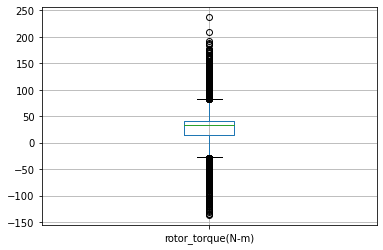

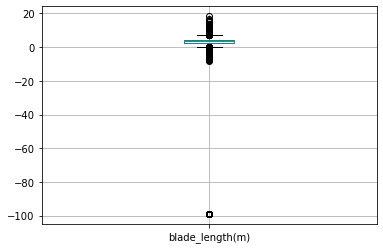

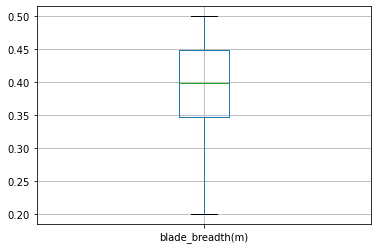

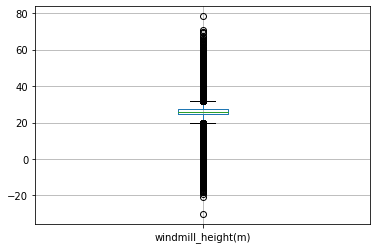

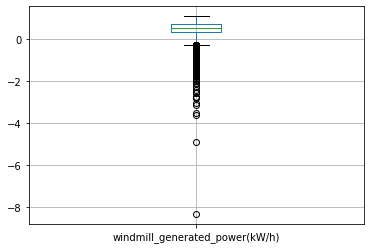

In [18]:
#Outliers
for feature in continous_features:
    data.boxplot(column=feature)
    plt.show()

In [19]:
#finding all the categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O' and feature not in ['tracking_id','datetime']]
print(len(categorical_features))

2


In [20]:
dataset[categorical_features].head()

,turbine_status,cloud_level
0,BA,Medium
1,A2,Medium
2,ABC,Medium
3,ABC,NaN
4,AAA,Medium


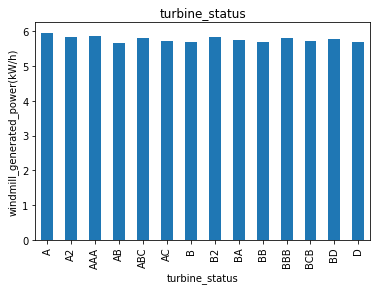

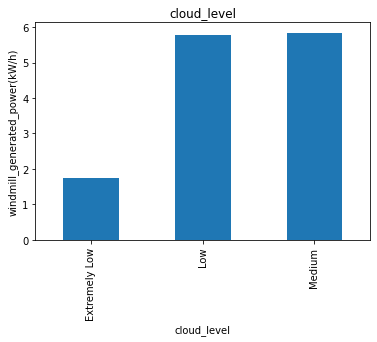

In [21]:
#relationship between categorical features and dependent feature(windmill_generated_power(kW/h))
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['windmill_generated_power(kW/h)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('windmill_generated_power(kW/h)')
    plt.title(feature)
    plt.show()

In [27]:
for feature in categorical_features:
    print(feature,len(dataset[feature].unique()))

turbine_status 15
cloud_level 4
